Task 8: Random Forest vs Decision Tree 

● Train a RandomForestClassifier on the same dataset used for Task 5. 

● Compare accuracy, precision, and recall with the standalone decision tree. 

● Plot feature importances. 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess Titanic dataset
titanic = sns.load_dataset('titanic')
titanic = titanic.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'])
titanic = titanic.dropna()

In [3]:
# Encode categorical variables
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [4]:
# Define features and target
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic['survived']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [7]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [8]:
# Decision Tree Metrics
print("---- Decision Tree ----")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))
print("Precision:", round(precision_score(y_test, y_pred_dt), 4))
print("Recall:", round(recall_score(y_test, y_pred_dt), 4))

# Random Forest Metrics
print("\n---- Random Forest ----")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf), 4))
print("Recall:", round(recall_score(y_test, y_pred_rf), 4))

---- Decision Tree ----
Accuracy: 0.7063
Precision: 0.7234
Recall: 0.5397

---- Random Forest ----
Accuracy: 0.7902
Precision: 0.8667
Recall: 0.619


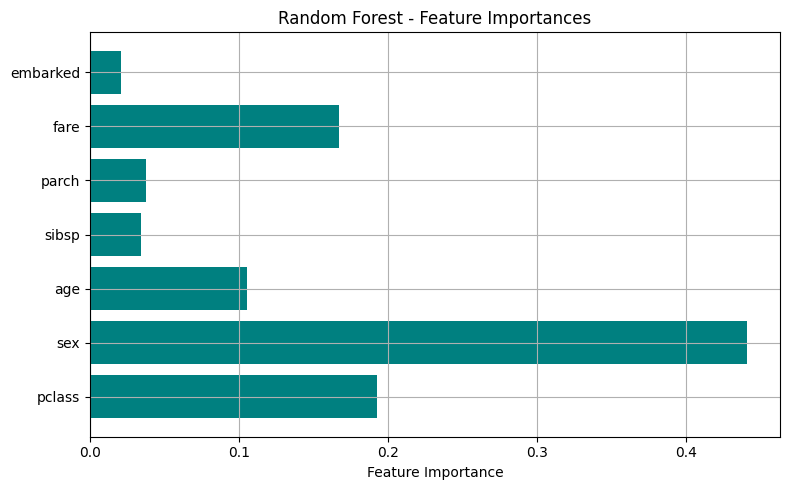

In [9]:
import numpy as np

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='teal')
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importances")
plt.grid(True)
plt.tight_layout()
plt.show()

 Conclusion: Random Forest usually performs better due to its ensemble nature, offering higher generalization and lower overfitting compared to a single decision tree.